In [1]:
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import math

if not os.path.abspath('.').endswith('netscope'):
    current_dir = os.path.abspath('.')
    root_path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('.'))))
    os.chdir(root_path)
    from analysis.load import Loader
    from evaluation.intsight.IntSight import IntSight

markers = list('ov^<>12348sp*hH+xXDd|_.,')+[i for i in range(12)]

mpl.rcParams.update({
    'axes.spines.right': False,
    'axes.spines.top': False,
})
plt.rc('figure', figsize=[6,3.5])
plt.rc('font', family='Times New Roman', size=18)

In [3]:
data = pd.DataFrame([
    dict(size=120, label="100 ms", TN=107, TP=116, FN=14, FP=5),
    dict(size=120, label="500 ms", TN=116, TP=106, FN=5, FP=15),
    dict(size=120, label="1000 ms", TN=117, TP=103, FN=4, FP=18),
    dict(size=120, label="5000 ms", TN=121, TP=32, FN=0, FP=89),
    dict(size=200, label="Reservoir", TN=120, TP=103, FN=1, FP=4),
    dict(size=250, label="Reservoir without $punish$", TN=120, TP=71, FN=1, FP=50),
])
# data
data['Recall'] = data.apply(lambda r: r.TP/(r.TP+r.FN), axis=1)
data['Precision'] = data.apply(lambda r: r.TP/(r.TP+r.FP), axis=1)
data

,size,label,TN,TP,FN,FP,Recall,Precision
0,120,100 ms,107,116,14,5,0.892308,0.958678
1,120,500 ms,116,106,5,15,0.954955,0.876033
2,120,1000 ms,117,103,4,18,0.962617,0.851240
3,120,5000 ms,121,32,0,89,1.000000,0.264463
4,200,Reservoir,120,103,1,4,0.990385,0.962617
5,250,Reservoir without $punish$,120,71,1,50,0.986111,0.586777


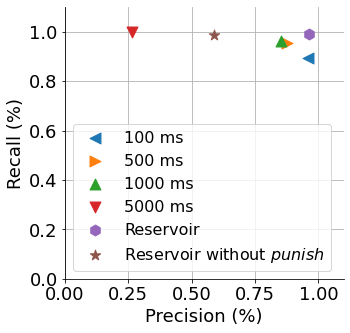

In [ ]:
markers = "<>^vh*s12348sp*hH+xXDd|_.,"
plt.figure(figsize=(5, 5))
for i, row in data.iterrows():
    plt.scatter(row.Precision, row.Recall, label=row.label, 
                 marker=markers[i], s=120, zorder=10)
plt.grid()
plt.xlabel('Precision (%)')
plt.ylabel('Recall (%)')
plt.ylim(0, 1.1)
plt.xlim(0, 1.1)
plt.legend(prop={'size': 16}, frameon=True)
plt.savefig(os.path.join(current_dir, 'ad.pdf'), bbox_inches = 'tight')